## Reading the Data (including question 1 and question 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/CS512/hw_1/train-features.txt"
path_v2 = "/content/drive/MyDrive/Colab Notebooks/CS512/hw_1/train-labels.txt"
path_v3 = "/content/drive/MyDrive/Colab Notebooks/CS512/hw_1/test-features.txt"
path_v4 = "/content/drive/MyDrive/Colab Notebooks/CS512/hw_1/test-labels.txt"

In [ ]:
# There are no words or names in columns. So ıt would be better first name these features

feature_words = []
for i in range(1,2501):
    feature_words.append("word{}".format(i))

In [ ]:
# importing pandas
import pandas as pd

# read text file into pandas DataFrame
traindf = pd.read_csv(path, sep=" ", header = None, names = feature_words)
traindf_l = pd.read_csv(path_v2, sep=" ", header = None, names=["label"])
testdf = pd.read_csv(path_v3, sep=" ", header = None, names = feature_words)
testdf_l = pd.read_csv(path_v4, sep=" ", header = None, names=["label"])

# display DataFrame
traindf

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word2491,word2492,word2493,word2494,word2495,word2496,word2497,word2498,word2499,word2500
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


         0    1
label  350  350


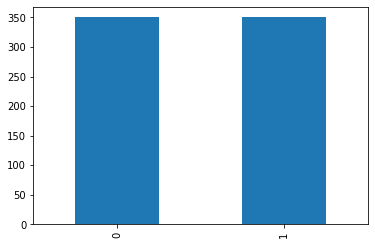

In [ ]:
# Question 1
# A balanced distribution we have in our labels, it is fifty-fifty
print(traindf_l['label'].value_counts().to_frame().T)
traindf_l['label'].value_counts().plot.bar()

In [ ]:
#Question 2
# There we have 2500 variables (words) in the dataset. First, we should calculate priors and that makes 1 parameter
# We should calculate P(Xi | Y = Spam) and P(Xi | Y = Nonspam) for every one of them which makes
# 2500 + 2500 = 5000 parameters. This means that we have 5001 parameters in total. Second prior no need to be calculated as we can easly find it by substracting it from 1.

## Question 3 (In this part, I have dealt with Question 3.3 and 3.4)


## Dictionary for word frequencies


In [ ]:
#Which word is more frequent
worddict = [] #unique words
wordlist = [] #corresponding frequencies of each word

for words in traindf.columns:
  worddict.append(words)
  totalwords = traindf[words].sum()
  wordlist.append(totalwords)

dicti = {} #dict where keys are worddict and values are wordlist
for key in worddict:
    for value in wordlist:
        dicti[key] = value
        wordlist.remove(value)
        break

In [ ]:
len(worddict)

2500

In [ ]:
#Vocabulary
worddict = np.array(worddict)
print(len(worddict))

#Wordcounts
word_counts = np.array(wordlist)
print(len(word_counts))

In [ ]:
#Which word is more frequent
worddict = [] #unique words
wordlist = [] #corresponding frequencies of each word

for words in traindf.columns:
  worddict.append(words)
  totalwords = traindf[words].sum()
  wordlist.append(totalwords)


## Naive Bayes

In [ ]:
#Constructing Naive Bayes through finding parameters step by step
priors = []
def find_priors(data,target):
  categories = sorted(list(data[target].unique()))
  for value in categories:
    priors.append(len(data[data[target]==value])/len(data))
  return priors

find_priors(traindf_l, 'label')

[0.5, 0.5]

In [ ]:
# First, I will merge traindf and traindf_l datasets because dealing only with feature vectors confuses me.
traindata = pd.concat([traindf, traindf_l], axis=1)
testdata = pd.concat([testdf, testdf_l], axis = 1)
traindata.tail()

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word2492,word2493,word2494,word2495,word2496,word2497,word2498,word2499,word2500,label
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
699,3,2,17,0,0,5,14,0,0,8,...,0,0,0,0,0,0,0,0,3,1


In [ ]:
# Seperating spam and nonspam emails. I am doing this so that I can calcualte number of spam and non spam emails
spam_email = traindata[traindata['label'] == 1] # This filters spam emails
nonspam_email = traindata[traindata['label'] == 0] # This filters nonspam emails

# Number of nonspams
words_in_nonspam = nonspam_email.sum(axis=1) # This stores the total number of words mentioned in nonspam emails
nonspam_total = words_in_nonspam.sum()

# Number of spams
words_in_spam = spam_email.sum(axis=1)
spam_total = words_in_spam.sum()

# Parameters
spam_parameters = {word:0 for word in feature_words} # An empty dictionary with comprehension where key is feature/word and value will be usege ratio per feature/word
nonspam_parameters = {word:0 for word in feature_words}

# Going over paramters and finalize them. Beforehand, I calcucalted priors and saved them into lists in above line but this is better I guess
for i in feature_words:
  spam_parameters[i] = (spam_email[i].sum() / spam_total) # this will give me the frequency ratio per feature/word in spam emails
  nonspam_parameters[i] = (nonspam_email[i].sum() / nonspam_total)
prior_spam = len(traindata.query("label == 1"))/len(traindata)
prior_nonspam = 1- prior_spam



In [ ]:
# First classifier without alpha laplace smoothing. This function is supposed to take test dataframe and calculate conditional probabilities for entire training data.
import math

def nb_classifier(test_data_features):
  given_email_pspam = []
  given_email_pnonspam = []
  for column_index in range(0, len(test_data_features)):
    k = 0
    z = 0
    for i in feature_words:
      k = k + ([math.log(spam_parameters[i]) if spam_parameters[i] > 0 else 0][0] * test_data_features.iloc[column_index][i]) #By following instructions, I take the log of these probs as multipyling might cause underflow issue.
      z = z + ([math.log(nonspam_parameters[i]) if nonspam_parameters[i] > 0 else 0][0] * test_data_features.iloc[column_index][i])
    given_email_pspam.append(math.log(prior_spam) + k) #Now, I will sum priors and conditionals for spam
    given_email_pnonspam.append(math.log(prior_nonspam) + z) #Now, I will sum priors and conditionals for non-spam
  return given_email_pspam, given_email_pnonspam

given_email_pspam, given_email_pnonspam = nb_classifier(testdf)
testdata['probabil_of_nonspam'] = given_email_pnonspam # These two will add two new columns representing posterior probabilities
testdata['probabil_of_spam'] = given_email_pspam

In [ ]:
#this function create a new column called "predicted" by a condition of whether Prob of spam or nonspam is bigger. It will compute the maximum arg via MLE
testdata['predicted'] = np.where(testdata['probabil_of_spam'] > testdata['probabil_of_nonspam'], 1, 0)  # Incase of ties,you should predict “non-spam”.
testdata.head()

In [ ]:
''' Accuracy metric. The score is low. MLE estimate is a bad idea in this situation because it only takes into account
the likelihood regarding what is the hypothesis (class:spam or non spam) that maximizes the likelihood of P(d|h).
The thing is that MLE does not consider the prior knowledge and hence it does not update probabilities in accordence with this. Plus there are lots of zeros as well in my training data.
MLE is not that much goog in handling with this over zero issue.
 '''

acc = np.sum(np.equal(testdata['label'], testdata['predicted'])) / len(testdata['label'])
print(f"Accuracy score with MLE is {acc:.3f}")

Accuracy score with MLE is 0.596


## Question 3.4 (MAP estimate of θ parameters using a fair Dirichlet prior.)

In [ ]:
alpha = 1

# Seperating spam and nonspam emails. I am doing this filter for the reason I mentioned above: P(Xi | Y = Spam) and P(Xi | Y = Nonspam)
s_email = traindata[traindata['label'] == 1]
nos_email = traindata[traindata['label'] == 0]

# Parameters for MAP
spam_parameters_v2 = {word:0 for word in feature_words}
nonspam_parameters_v2 = {word:0 for word in feature_words}

# Going over parameters and finalize them. Differently from previous one, this case will add alpha smoothing.
for i in feature_words:
  spam_parameters_v2[i] = (s_email[i].sum() + alpha) / (spam_total + (alpha * 2500)) # this will give me the frequency ratio per feature/word in spam emails
  nonspam_parameters_v2[i] = (nos_email[i].sum() + alpha) / (nonspam_total + (alpha * 2500)) #Multiply aplha with 2500 as I have that much feature words in my data
prior_spam = len(traindata.query("label == 1"))/len(traindata)
prior_nonspam = 1- prior_spam

#Classifier for MAP. THe only difference is alpha which is supposed to make predicitons a lot different than MLE previous case

def nb_classifier_v2(test_data_features):
  given_email_pspam_v2 = []
  given_email_pnonspam_v2 = []
  for column_index in range(0, len(test_data_features)):
    k = 0
    z = 0
    for i in feature_words:
      k = k + ([math.log(spam_parameters_v2[i]) if spam_parameters_v2[i] > 0 else 0][0] * test_data_features.iloc[column_index][i])
      z = z + ([math.log(nonspam_parameters_v2[i]) if nonspam_parameters_v2[i] > 0 else 0][0] * test_data_features.iloc[column_index][i])
    given_email_pspam_v2.append(math.log(prior_spam) + k)
    given_email_pnonspam_v2.append(math.log(prior_nonspam) + z)
  return given_email_pspam_v2, given_email_pnonspam_v2

given_email_pspam_v2, given_email_pnonspam_v2 = nb_classifier_v2(testdf)
testdata['probabil_of_nonspam'] = given_email_pnonspam_v2 # These two will add two new columns representing posterior probabilities
testdata['probabil_of_spam'] = given_email_pspam_v2

In [ ]:
#this function create a new column called "predicted" by a condition of whether Prob of spam or nonspam is bigger. It will compute the maximum arg via MAP
testdata['predicted'] = np.where(testdata['probabil_of_spam'] > testdata['probabil_of_nonspam'], 1, 0) # Incase of ties,you should predict “non-spam”.
testdata.head()

,word1,word2,word3,word4,word5,word6,word7,word8,word9,word10,...,word2495,word2496,word2497,word2498,word2499,word2500,label,probabil_of_nonspam,probabil_of_spam,predicted
0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,6,0,0,-463.571783,-542.454395,0
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,10,0,0,-310.256421,-351.687145,0
2,0,0,0,2,0,0,0,4,0,0,...,0,0,0,0,6,0,0,-681.705604,-916.895369,0
3,0,0,0,1,0,0,2,0,0,0,...,0,0,0,0,9,0,0,-720.315298,-794.514449,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,10,0,0,-312.076719,-346.151278,0


In [ ]:
# The score is exatcly same with sklearn as MAP does a better job in this task by considering priors.
acc_2 = np.sum(np.equal(testdata['label'], testdata['predicted'])) / len(testdata['label'])
print(f"Accuracy score with MAP is {acc_2:.3f}")

Accuracy score with MAP is 0.973


## Sklearn Comparison (The result is almost same)

In [ ]:
train_split = pd.read_csv(path, sep=" ", header = None, names = feature_columns)
train_label = pd.read_csv(path_v2, sep=" ", header = None, names=["label"])
test_split = pd.read_csv(path_v3, sep=" ", header = None, names = feature_columns)
test_label = pd.read_csv(path_v4, sep=" ", header = None, names=["label"])

In [ ]:
train_split = train_split.to_numpy()
train_label = train_label.to_numpy()
test_split = test_split.to_numpy()
test_label = test_label.to_numpy()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(train_split, train_label)
clf.predict(test_split)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [ ]:
print("Test accuracy with SKlearn:",clf.score(test_split,test_label))

Test accuracy with SKlearn: 0.9730769230769231
